# Outliers

In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


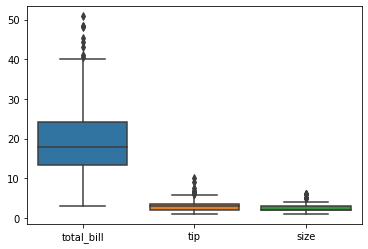

In [3]:
sns.boxplot(data=tips);

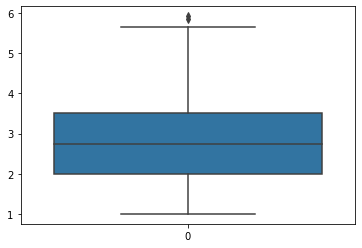

In [8]:
sns.boxplot(data=tips['tip']);

In [9]:
Q1 = np.percentile(tips['tip'], 25, interpolation = 'midpoint')
Q3 = np.percentile(tips['tip'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  -0.25
higher bound outliers 5.75


In [10]:
tips = tips.drop(tips[(tips['tip'] > 5.9375) | (tips['tip'] < -0.36250)].index)

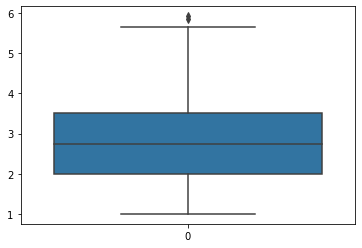

In [11]:
sns.boxplot(data=tips['tip']);

In [12]:
Q1 = np.percentile(tips['total_bill'], 25, interpolation = 'midpoint')
Q3 = np.percentile(tips['total_bill'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  -2.219999999999999
higher bound outliers 38.94


In [13]:
tips = tips.drop(tips[(tips['total_bill'] > 38.94) | (tips['total_bill'] < -2.2199)].index)

In [14]:
Q1 = np.percentile(tips['size'], 25, interpolation = 'midpoint')
Q3 = np.percentile(tips['size'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  0.5
higher bound outliers 4.5


In [15]:
tips = tips.drop(tips[(tips['size'] > 4.5) | (tips['size'] < 0.5)].index)

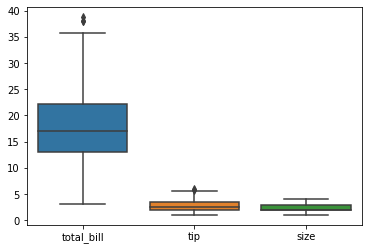

In [16]:
sns.boxplot(data=tips);

# Missing Data

In [17]:
data = {'Name':['Ali','Abduallah',np.nan,'Sami',np.nan,'Amal',np.nan,np.nan,'Amjad','Shahed'],
      'Gender':['Male','Male', np.nan,'Male','Male','Female','Female','Female','Female','Female'],
      'Income':[5000, 7000, np.nan, 7000, 3000, np.nan, 7000, 3000, 7000, 1000],
       'Work Office':[np.nan, 1, np.nan, 2, 1, 2, 1, np.nan, 3, 3]}
 
data = pd.DataFrame(data)

In [18]:
data

,Name,Gender,Income,Work Office
0,Ali,Male,5000.0,NaN
1,Abduallah,Male,7000.0,1.0
2,NaN,NaN,NaN,NaN
3,Sami,Male,7000.0,2.0
4,NaN,Male,3000.0,1.0
5,Amal,Female,NaN,2.0
6,NaN,Female,7000.0,1.0
7,NaN,Female,3000.0,NaN
8,Amjad,Female,7000.0,3.0
9,Shahed,Female,1000.0,3.0


## Identifying the Missing Data

In [19]:
data.isnull() # or .notnull()

,Name,Gender,Income,Work Office
0,False,False,False,True
1,False,False,False,False
2,True,True,True,True
3,False,False,False,False
4,True,False,False,False
5,False,False,True,False
6,True,False,False,False
7,True,False,False,True
8,False,False,False,False
9,False,False,False,False


In [20]:
data.isnull().sum()

Name           4
Gender         1
Income         2
Work Office    3
dtype: int64

In [21]:
data.isna().sum()

Name           4
Gender         1
Income         2
Work Office    3
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6 non-null      object 
 1   Gender       9 non-null      object 
 2   Income       8 non-null      float64
 3   Work Office  7 non-null      float64
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


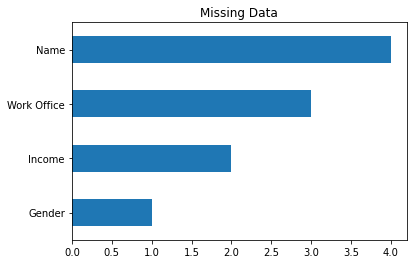

In [23]:
data.isnull().sum().sort_values().plot(kind="barh", title="Missing Data");

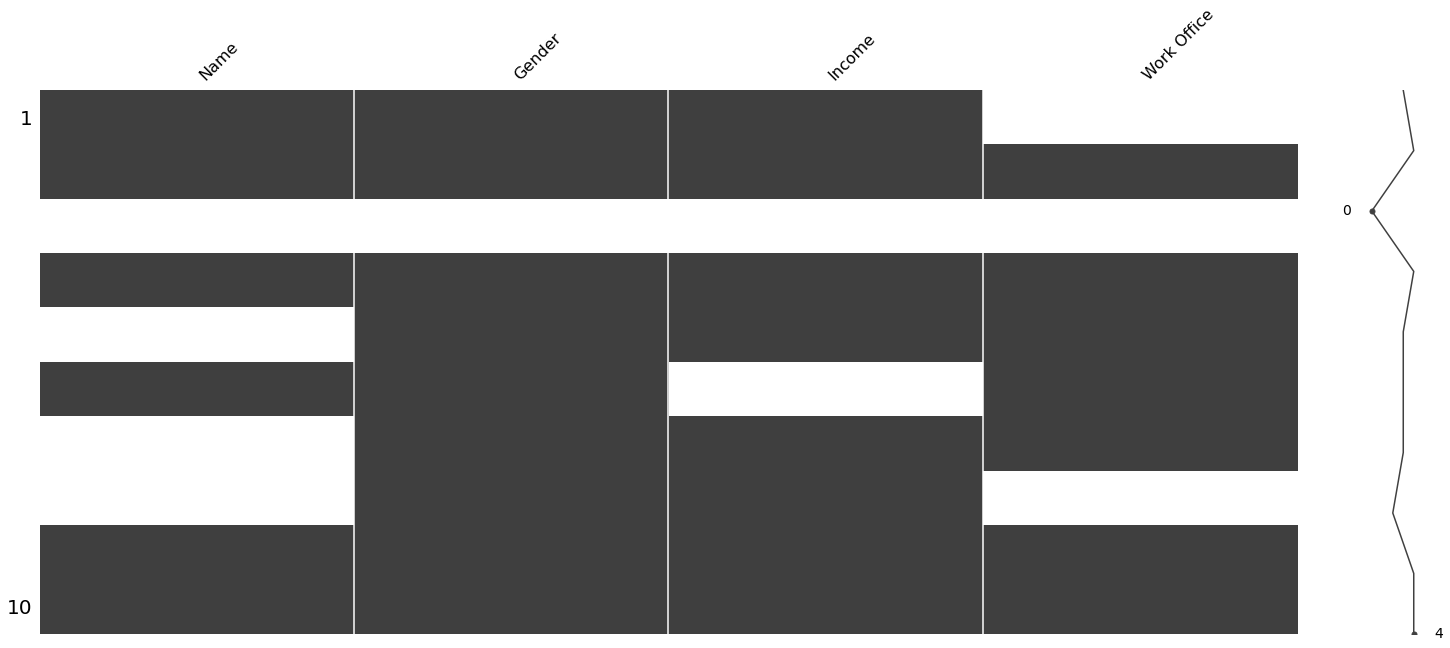

In [24]:
import missingno as msno  # pip install missingno

# Plot correlation heatmap of missingness
msno.matrix(data);

## Handling the Missing Data

### 1- Data Dropping

In [25]:
data

,Name,Gender,Income,Work Office
0,Ali,Male,5000.0,NaN
1,Abduallah,Male,7000.0,1.0
2,NaN,NaN,NaN,NaN
3,Sami,Male,7000.0,2.0
4,NaN,Male,3000.0,1.0
5,Amal,Female,NaN,2.0
6,NaN,Female,7000.0,1.0
7,NaN,Female,3000.0,NaN
8,Amjad,Female,7000.0,3.0
9,Shahed,Female,1000.0,3.0


In [26]:
d_data = data.dropna()
d_data

,Name,Gender,Income,Work Office
1,Abduallah,Male,7000.0,1.0
3,Sami,Male,7000.0,2.0
8,Amjad,Female,7000.0,3.0
9,Shahed,Female,1000.0,3.0


In [27]:
d_data = data.dropna(how="all")
d_data

,Name,Gender,Income,Work Office
0,Ali,Male,5000.0,NaN
1,Abduallah,Male,7000.0,1.0
3,Sami,Male,7000.0,2.0
4,NaN,Male,3000.0,1.0
5,Amal,Female,NaN,2.0
6,NaN,Female,7000.0,1.0
7,NaN,Female,3000.0,NaN
8,Amjad,Female,7000.0,3.0
9,Shahed,Female,1000.0,3.0


In [28]:
d_data = data.dropna(axis=1)
d_data

""
0
1
2
3
4
5
6
7
8
9


### 2- Imputation

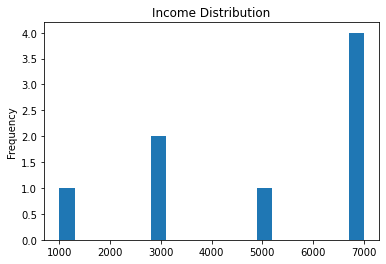

In [29]:
# continuous data
data.Income.plot(kind="hist", bins=20, title="Income Distribution");

In [32]:
data.Income.var()

5714285.714285715

In [33]:
Income_mean = round(data.Income.mean())
print('Avg. Income = ', Income_mean)

Avg. Income =  5000


In [34]:
data.Income = data.Income.fillna(Income_mean)
data.Income.isnull().sum()

0

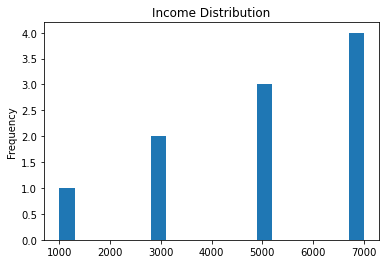

In [35]:
data.Income.plot(kind="hist", bins=20, title="Income Distribution");

In [36]:
data.Income.var()

4444444.444444444

In [37]:
data

,Name,Gender,Income,Work Office
0,Ali,Male,5000.0,NaN
1,Abduallah,Male,7000.0,1.0
2,NaN,NaN,5000.0,NaN
3,Sami,Male,7000.0,2.0
4,NaN,Male,3000.0,1.0
5,Amal,Female,5000.0,2.0
6,NaN,Female,7000.0,1.0
7,NaN,Female,3000.0,NaN
8,Amjad,Female,7000.0,3.0
9,Shahed,Female,1000.0,3.0


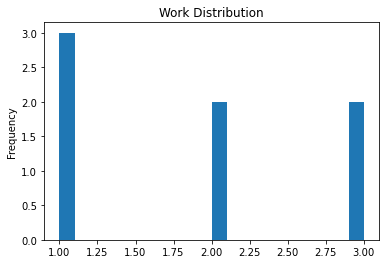

In [38]:
# catagorical data 
data['Work Office'].plot(kind="hist", bins=20, title="Work Distribution");

In [39]:
# mean is not suitable as it would give a value that is not represented in the dataset 
data['Work Office'].mean()

1.8571428571428572

In [40]:
Work_mode = data['Work Office'].mode()[0]
Work_mode

1.0

In [41]:
data['Work Office'] = data['Work Office'].fillna(Work_mode) # we can use replace(np.NaN, Work_mode)
data['Work Office'].isnull().sum()

0

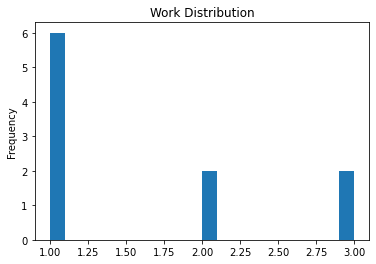

In [42]:
data['Work Office'].plot(kind="hist", bins=20, title="Work Distribution");

In [43]:
data

,Name,Gender,Income,Work Office
0,Ali,Male,5000.0,1.0
1,Abduallah,Male,7000.0,1.0
2,NaN,NaN,5000.0,1.0
3,Sami,Male,7000.0,2.0
4,NaN,Male,3000.0,1.0
5,Amal,Female,5000.0,2.0
6,NaN,Female,7000.0,1.0
7,NaN,Female,3000.0,1.0
8,Amjad,Female,7000.0,3.0
9,Shahed,Female,1000.0,3.0


In [44]:
data_v2 = {'Name':['Ali','Abduallah','Sultan','Sami','Khalid','Amal','Maha','Razan','Amjad','Shahed'],
      'Gender':['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female'],
      'Income':[5000, np.nan, 3000, 7000, np.nan, 5000, np.nan, np.nan, 7000, 1000]}

data_v2 = pd.DataFrame(data_v2)
data_v2

,Name,Gender,Income
0,Ali,Male,5000.0
1,Abduallah,Male,NaN
2,Sultan,Male,3000.0
3,Sami,Male,7000.0
4,Khalid,Male,NaN
5,Amal,Female,5000.0
6,Maha,Female,NaN
7,Razan,Female,NaN
8,Amjad,Female,7000.0
9,Shahed,Female,1000.0


In [45]:
# sometimes it's better to fill the missing data with the sub-mean rather than the whole mean

female_data = data_v2[data_v2["Gender"] == "Female"]
male_data = data_v2[data_v2["Gender"] == "Male"]

female_avg = round(female_data.Income.mean())
male_avg = round(male_data.Income.mean())

print('Female Avg. Income', female_avg)
print('Male Avg. Income', male_avg)

Female Avg. Income 4333
Male Avg. Income 5000


5466666.666666667

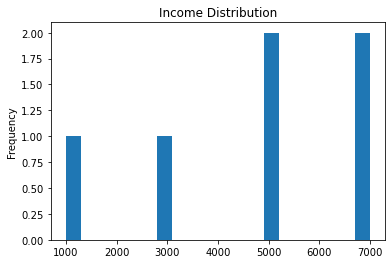

In [46]:
data_v2.Income.plot(kind="hist", bins=20, title="Income Distribution");
data_v2.Income.var()

In [47]:
data_v2.loc[(data_v2['Income'].isna()) & (data_v2["Gender"] == "Female")] = \
data_v2.loc[(data_v2['Income'].isna()) & (data_v2["Gender"] == "Female")].fillna(female_avg)
data_v2

,Name,Gender,Income
0,Ali,Male,5000.0
1,Abduallah,Male,NaN
2,Sultan,Male,3000.0
3,Sami,Male,7000.0
4,Khalid,Male,NaN
5,Amal,Female,5000.0
6,Maha,Female,4333.0
7,Razan,Female,4333.0
8,Amjad,Female,7000.0
9,Shahed,Female,1000.0


In [48]:
data_v2.loc[(data_v2['Income'].isna()) & (data_v2["Gender"] == "Male")] = \
data_v2.loc[(data_v2['Income'].isna()) & (data_v2["Gender"] == "Male")].fillna(male_avg)
data_v2

,Name,Gender,Income
0,Ali,Male,5000.0
1,Abduallah,Male,5000.0
2,Sultan,Male,3000.0
3,Sami,Male,7000.0
4,Khalid,Male,5000.0
5,Amal,Female,5000.0
6,Maha,Female,4333.0
7,Razan,Female,4333.0
8,Amjad,Female,7000.0
9,Shahed,Female,1000.0


In [49]:
data_v2.Income.isnull().sum()

0

3086469.1555555556

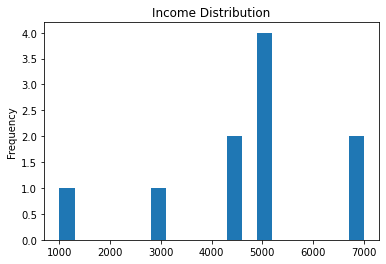

In [50]:
data_v2.Income.plot(kind="hist", bins=20, title="Income Distribution");
data_v2.Income.var()

### Real Data

In [51]:
grades = pd.read_csv('class-grades.csv', error_bad_lines=False) # because we have \r new line character
grades

b'Skipping line 22: expected 6 fields, saw 7\nSkipping line 40: expected 6 fields, saw 7\nSkipping line 62: expected 6 fields, saw 7\n'


,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
...,...,...,...,...,...,...
91,8,96.73,103.71,45.00,93.52,61.94
92,7,85.34,80.54,41.25,93.70,39.72
93,8,89.94,102.77,87.50,90.74,87.78
94,7,95.60,76.13,66.25,99.81,85.56


In [52]:
grades.isnull().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      1
Final         0
dtype: int64

In [53]:
# add missing data
for col in grades.columns:
    grades.loc[grades.sample(frac=0.1).index, col] = pd.np.nan 

In [54]:
grades.isnull().sum()

Prefix        10
Assignment    10
Tutorial      10
Midterm       10
TakeHome      11
Final         10
dtype: int64

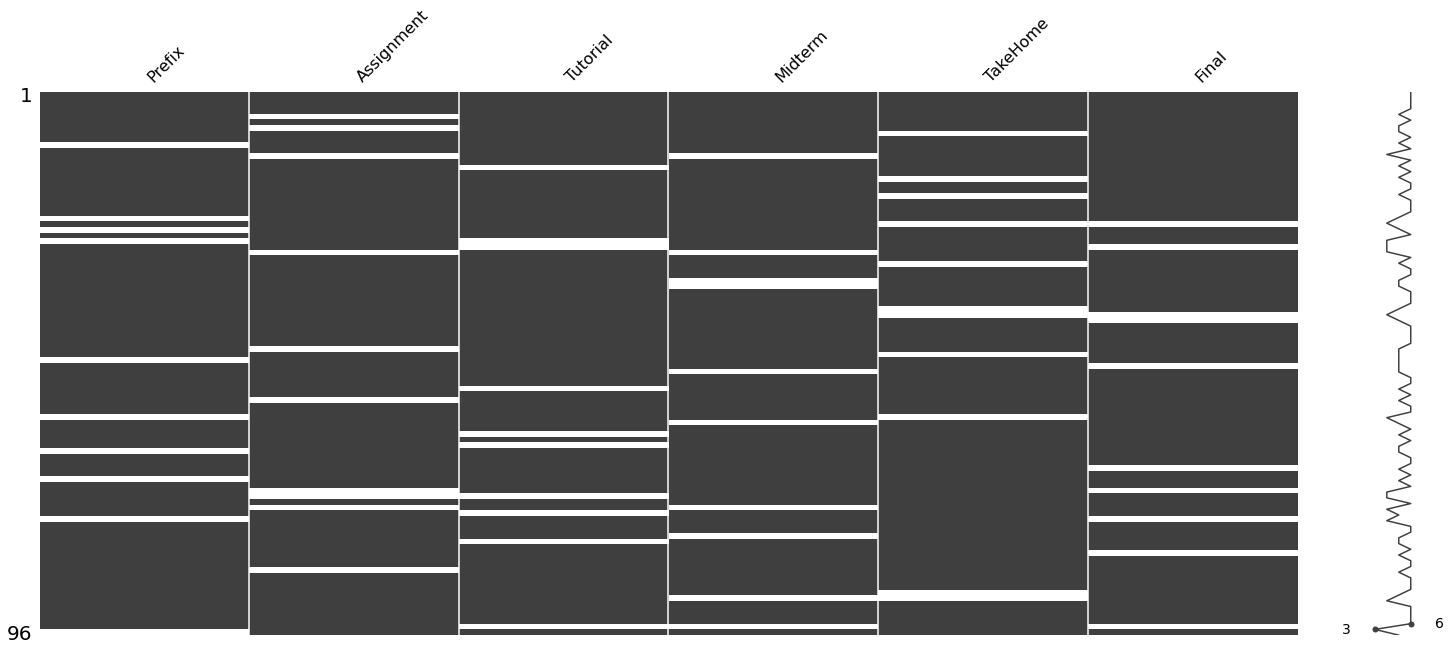

In [55]:
# Plot correlation heatmap of missingness
msno.matrix(grades);

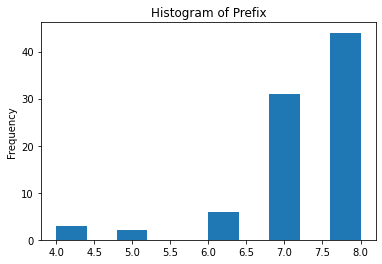

In [56]:
grades['Prefix'].plot(kind="hist", title="Histogram of Prefix");

In [57]:
grades['Prefix'].var()

0.9145006839945286

In [58]:
prefix_mean = round(grades['Prefix'].mean())
prefix_mean

7

In [59]:
grades['Prefix'] = grades['Prefix'].fillna(prefix_mean)
grades['Prefix'].isnull().sum()

0

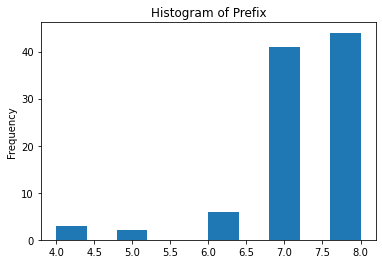

In [60]:
grades['Prefix'].plot(kind="hist", title="Histogram of Prefix");

In [61]:
grades['Prefix'].var()

0.8262061403508767

In [62]:
grades.isnull().sum()

Prefix         0
Assignment    10
Tutorial      10
Midterm       10
TakeHome      11
Final         10
dtype: int64

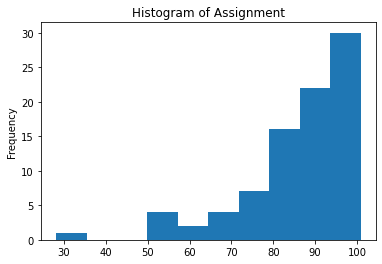

In [63]:
grades['Assignment'].plot(kind="hist", title="Histogram of Assignment");

In [64]:
grades['Assignment'].var()

169.85404262653896

In [65]:
assignment_median = round(grades['Assignment'].median())
assignment_median

91

In [66]:
grades['Assignment'] = grades['Assignment'].fillna(assignment_median)
grades['Assignment'].isnull().sum()

0

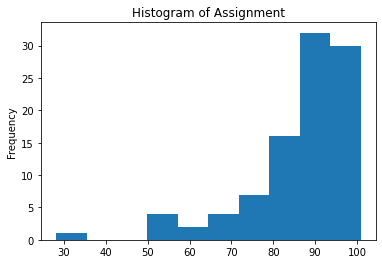

In [67]:
grades['Assignment'].plot(kind="hist",title="Histogram of Assignment");

In [68]:
grades['Assignment'].var()

154.48338065789477

In [69]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial      10
Midterm       10
TakeHome      11
Final         10
dtype: int64

In [70]:
# Forward Filling  >> use the previous value
grades['Tutorial'][0:30]

0      34.09
1     105.49
2      83.17
3      96.06
4      93.64
5      92.58
6     102.99
7      86.85
8      93.10
9      97.55
10     90.20
11     80.60
12    103.71
13       NaN
14     89.08
15     95.43
16     89.08
17    102.52
18     81.85
19     82.93
20     97.52
21     76.21
22     90.20
23     82.01
24     95.24
25     86.65
26       NaN
27       NaN
28     65.18
29    102.46
Name: Tutorial, dtype: float64

In [71]:
grades['Tutorial'] = grades['Tutorial'].fillna(method="ffill")

In [73]:
grades['Tutorial'][0:30]

0      34.09
1     105.49
2      83.17
3      96.06
4      93.64
5      92.58
6     102.99
7      86.85
8      93.10
9      97.55
10     90.20
11     80.60
12    103.71
13    103.71
14     89.08
15     95.43
16     89.08
17    102.52
18     81.85
19     82.93
20     97.52
21     76.21
22     90.20
23     82.01
24     95.24
25     86.65
26     86.65
27     86.65
28     65.18
29    102.46
Name: Tutorial, dtype: float64

In [74]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial       0
Midterm       10
TakeHome      11
Final         10
dtype: int64

In [75]:
# Backward Filling >> use the next value
grades['TakeHome'][0:10]

0     51.48
1     99.07
2     63.15
3    105.93
4    107.41
5     97.78
6     99.07
7       NaN
8     18.52
9     88.89
Name: TakeHome, dtype: float64

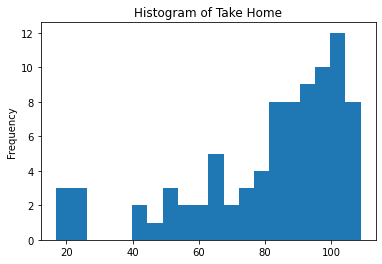

In [76]:
grades['TakeHome'].plot(kind="hist", bins=20, title="Histogram of Take Home");

In [77]:
grades['TakeHome'].fillna(method="bfill", inplace= True)

In [78]:
grades['TakeHome'][0:10]

0     51.48
1     99.07
2     63.15
3    105.93
4    107.41
5     97.78
6     99.07
7     18.52
8     18.52
9     88.89
Name: TakeHome, dtype: float64

In [79]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial       0
Midterm       10
TakeHome       0
Final         10
dtype: int64

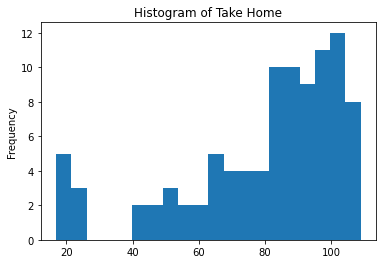

In [80]:
grades['TakeHome'].plot(kind="hist", bins=20, title="Histogram of Take Home");

In [81]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial       0
Midterm       10
TakeHome       0
Final         10
dtype: int64

In [75]:
# Random Sample Imputation
def random_sample_imputation(df):
    cols_with_missing_values = df.columns[df.isna().any()].tolist()
    
    for var in cols_with_missing_values:
        # extract a random sample
        random_sample_df = df[var].dropna().sample(df[var].isnull().sum(), random_state=0)
        # re-index the randomly extracted sample
        random_sample_df.index = df[df[var].isnull()].index

        # replace the NA
        df.loc[df[var].isnull(), var] = random_sample_df
    return df

In [76]:
random_sample_imputation(grades)
grades.isnull().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      0
Final         0
dtype: int64

# Resources:
- https://chen5595.cems.umn.edu/SameStats-DifferentGraphs.pdf
- https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html
- Wes McKinney, 2018, Python for Data Analysis, 2ed edition, O’Reilly Media, US.
- https://www.idrc.ca/sites/default/files/sp/Documents%20EN/10-data-visualization-tips-en.pdf
- https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values